In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

np.random.seed(3141593)
tf.set_random_seed(3141593)

#read data set
train_file = "../input/train.csv"
test_file = "../input/test.csv"
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

#encode the labels
x_train = train.drop(['species', 'id'], axis=1).values
le = LabelEncoder().fit(train['species'])
y_train = le.transform(train['species'])

x_test = test.drop(['id'], axis=1).values
test_ids = test['id']

#normalise the inputs
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [2]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12,6))
    plt.plot(history.history["loss"], color="purple")
    plt.plot(history.history["acc"], color="blue")
    plt.plot(history.history["val_loss"], color="red")
    plt.plot(history.history["val_acc"], color="green")
    plt.xlim(0,)
    plt.ylim(0,1)
    plt.legend(['loss', 'acc', "val_loss", "val_acc"], loc='upper right')
    plt.show()

In [3]:
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation
from keras.optimizers import Adam

y_cat = to_categorical(y_train)

#function to create different models for tuning
def create_model(weight_init='glorot_normal', lr=0.001, decay=0.0, drop=0.3): 
    model = Sequential() 
    model.add(Dense(512, input_dim=192, init=weight_init, activation='relu')) 
    model.add(Dropout(drop)) 
    model.add(Dense(256, activation='sigmoid')) 
    model.add(Dropout(drop)) 
    model.add(Dense(99, activation='softmax'))
    #compile model
    model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=lr, decay=decay), 
                  metrics = ["accuracy"])
    return model

batch = [32,64,128,256,512] 
lr = [0.1, 0.01, 0.005, 0.001] 
decay = [0, 0.0001, 0.000001] 
weight_init = ['uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform']
drop = [0.1, 0.2, 0.3, 0.4]

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=192, activation="relu", kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()


Instructions for updating:
Use tf.cast instead.
uniform weight initialisation has a val_loss at epoch 40 = 0.13072942197322845


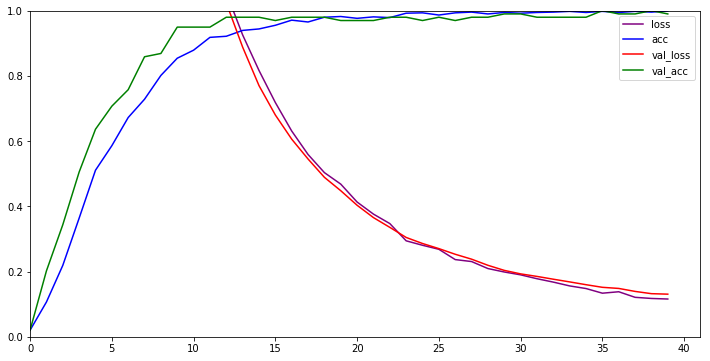

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=192, activation="relu", kernel_initializer="normal")`
  # This is added back by InteractiveShellApp.init_path()


normal weight initialisation has a val_loss at epoch 40 = 0.1314101219177246


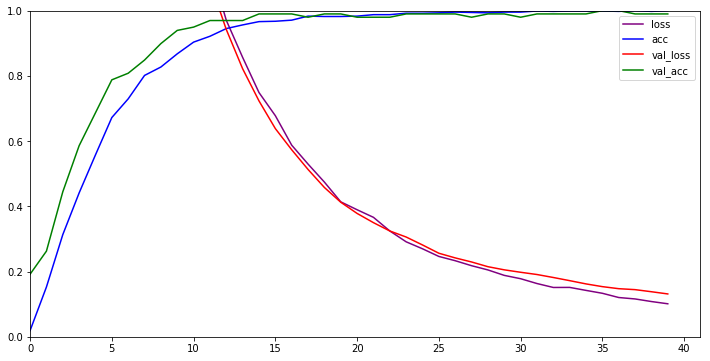

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=192, activation="relu", kernel_initializer="zero")`
  # This is added back by InteractiveShellApp.init_path()


zero weight initialisation has a val_loss at epoch 40 = 4.708051681518555


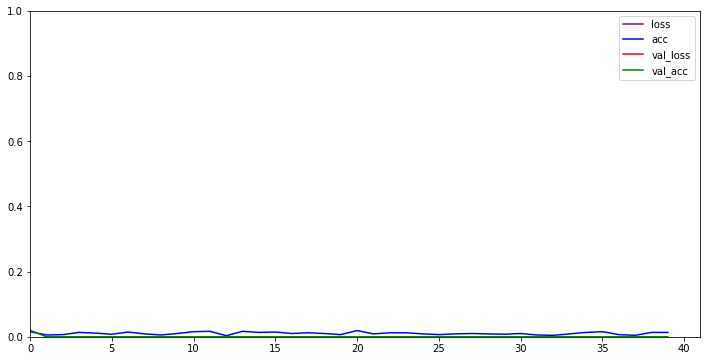

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=192, activation="relu", kernel_initializer="glorot_normal")`
  # This is added back by InteractiveShellApp.init_path()


glorot_normal weight initialisation has a val_loss at epoch 40 = 0.13690952956676483


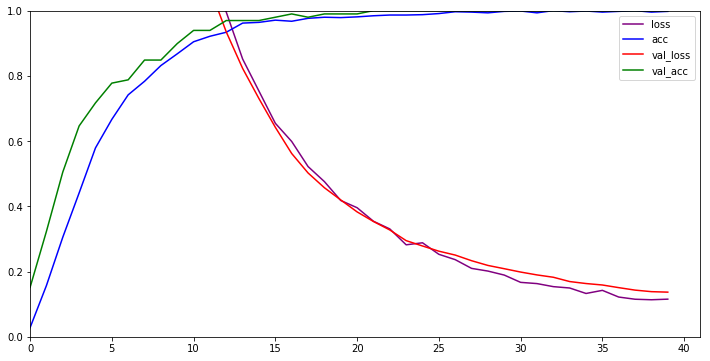

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=192, activation="relu", kernel_initializer="glorot_uniform")`
  # This is added back by InteractiveShellApp.init_path()


glorot_uniform weight initialisation has a val_loss at epoch 40 = 0.11931785196065903


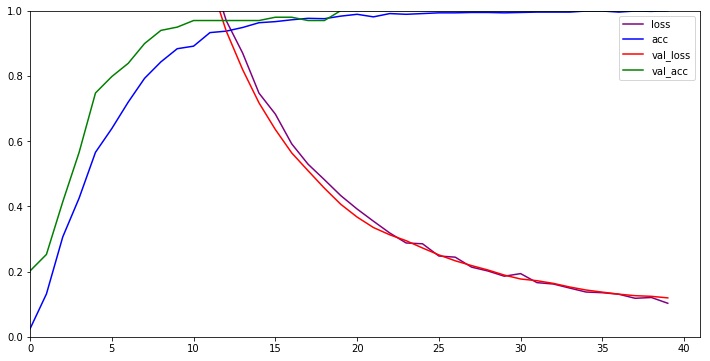

In [4]:
for init in weight_init:
    model = create_model(weight_init=init)
    history = model.fit(x_train, y_cat, batch_size=128, epochs=40, verbose=0, validation_split=0.1)
    print(init, "weight initialisation has a val_loss at epoch 40 =", history.history["val_loss"][-1])
    plot_history(history)

=> glorot_uniform  weight initialisation gives the best validation loss.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=192, activation="relu", kernel_initializer="glorot_uniform")`
  # This is added back by InteractiveShellApp.init_path()


learning rate 0.1 with decay 0 has a val_loss at epoch 40 = 7.973641395568848


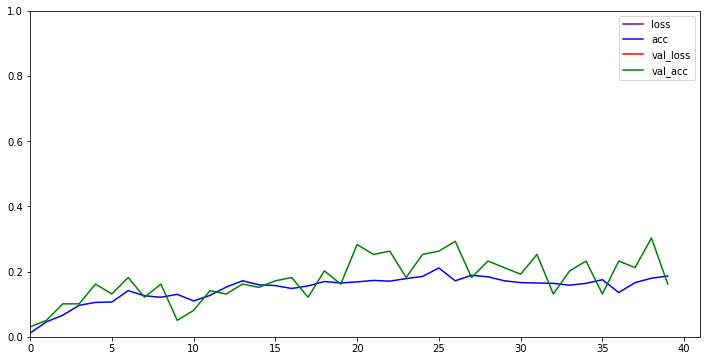

learning rate 0.1 with decay 0.0001 has a val_loss at epoch 40 = 8.203767776489258


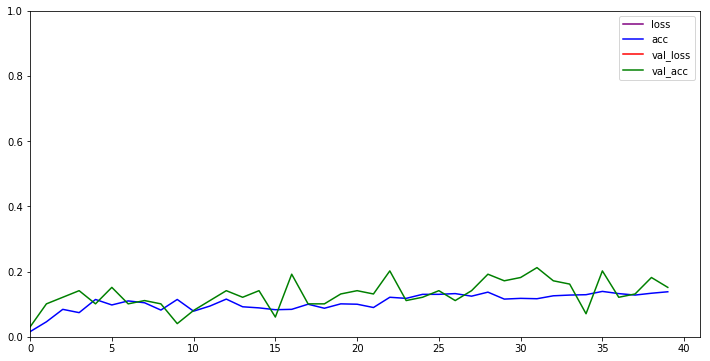

learning rate 0.1 with decay 1e-06 has a val_loss at epoch 40 = 8.468077659606934


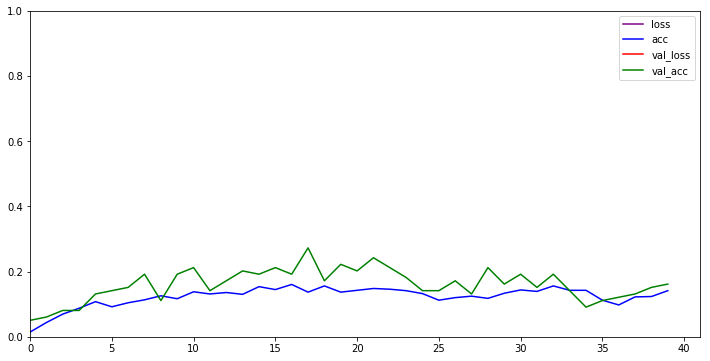

learning rate 0.01 with decay 0 has a val_loss at epoch 40 = 0.008852530270814896


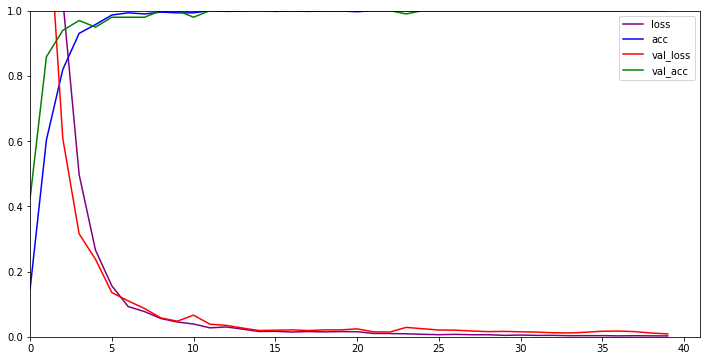

learning rate 0.01 with decay 0.0001 has a val_loss at epoch 40 = 0.01234157383441925


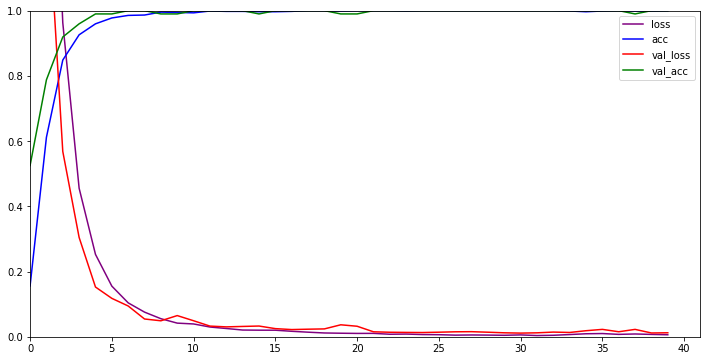

learning rate 0.01 with decay 1e-06 has a val_loss at epoch 40 = 0.03958771005272865


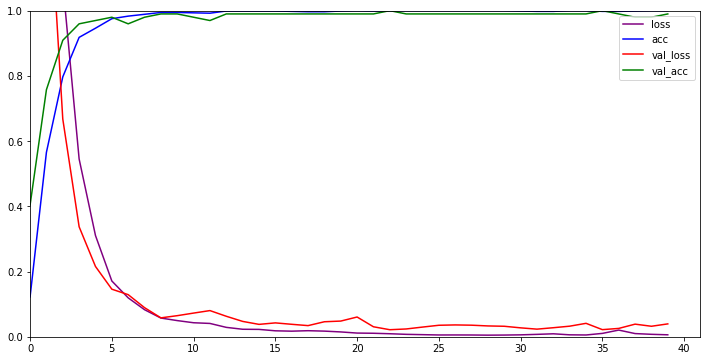

learning rate 0.005 with decay 0 has a val_loss at epoch 40 = 0.019991451874375343


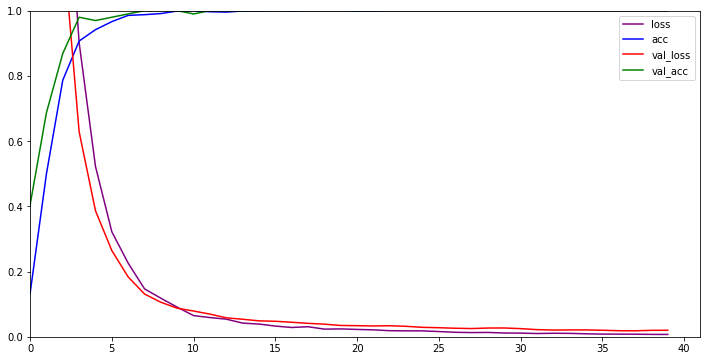

learning rate 0.005 with decay 0.0001 has a val_loss at epoch 40 = 0.023288825526833534


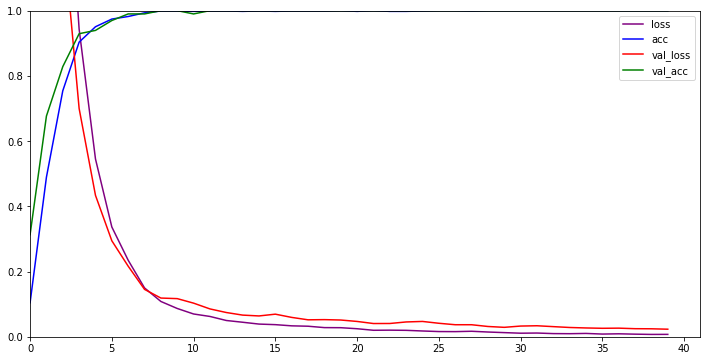

learning rate 0.005 with decay 1e-06 has a val_loss at epoch 40 = 0.025615034624934196


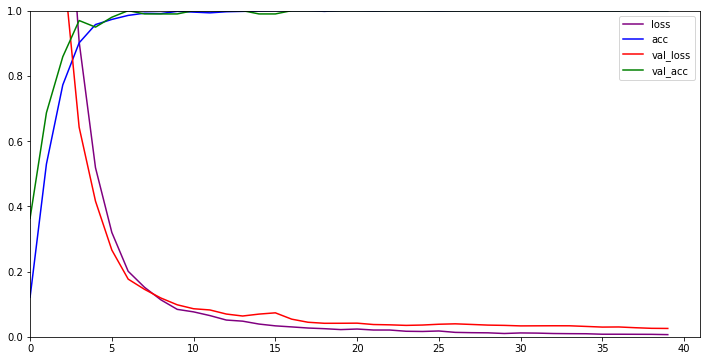

learning rate 0.001 with decay 0 has a val_loss at epoch 40 = 0.13555078208446503


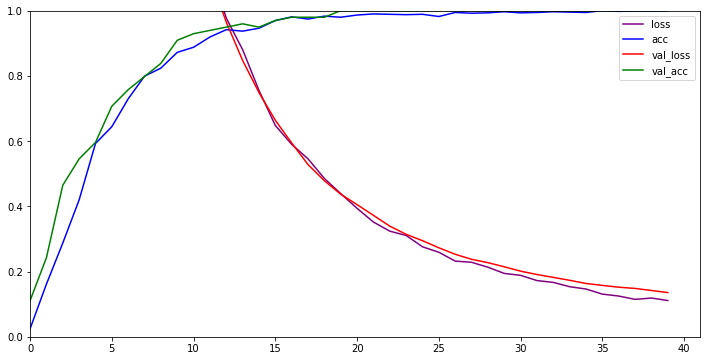

learning rate 0.001 with decay 0.0001 has a val_loss at epoch 40 = 0.12301764637231827


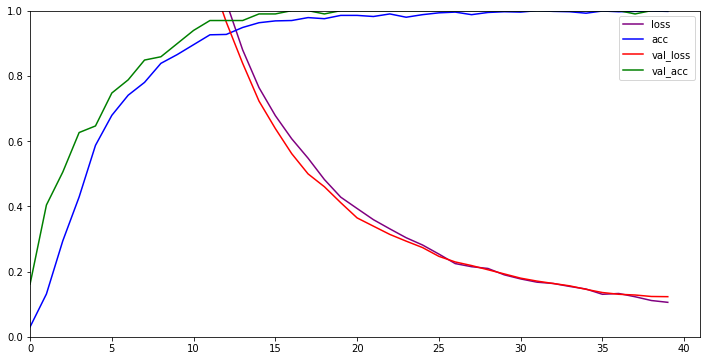

learning rate 0.001 with decay 1e-06 has a val_loss at epoch 40 = 0.12982489168643951


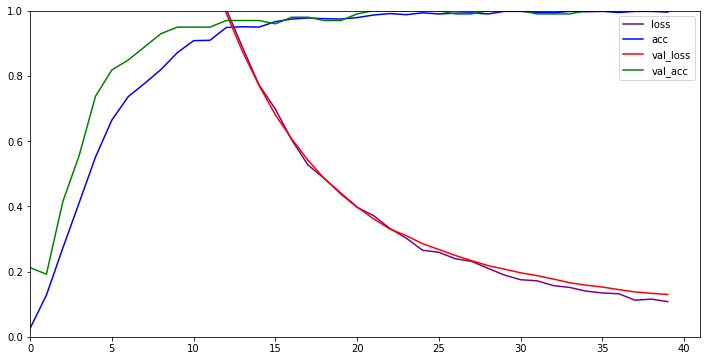

In [5]:
for lrate in lr:
    for d in decay:
        model = create_model(weight_init='glorot_uniform', lr=lrate, decay=d)
        history = model.fit(x_train, y_cat, batch_size=128, epochs=40, verbose=0, validation_split=0.1)
        print("learning rate", lrate, "with decay", d, "has a val_loss at epoch 40 =", 
              history.history["val_loss"][-1])
        plot_history(history)

=> learning rate 0.01 with decay 0.0 seems to reach a low validation loss faster.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=192, activation="relu", kernel_initializer="glorot_uniform")`
  # This is added back by InteractiveShellApp.init_path()


dropout of 0.1 has a val_loss at epoch 40 = 0.017277074977755547


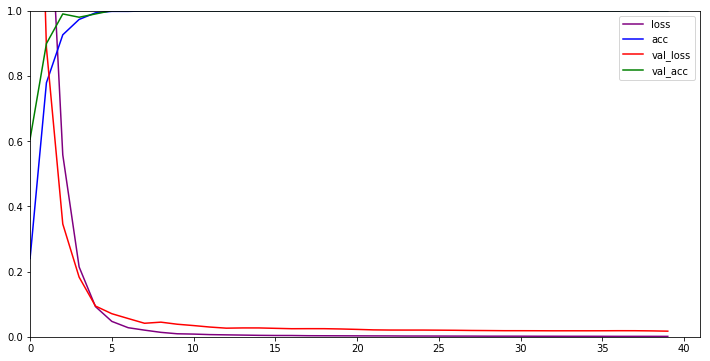

dropout of 0.2 has a val_loss at epoch 40 = 0.022685009986162186


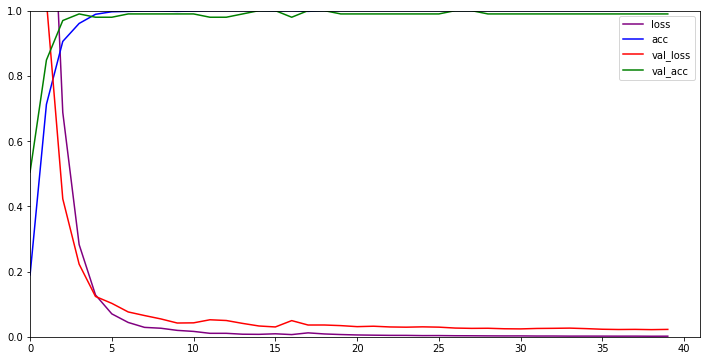

dropout of 0.3 has a val_loss at epoch 40 = 0.018663758412003517


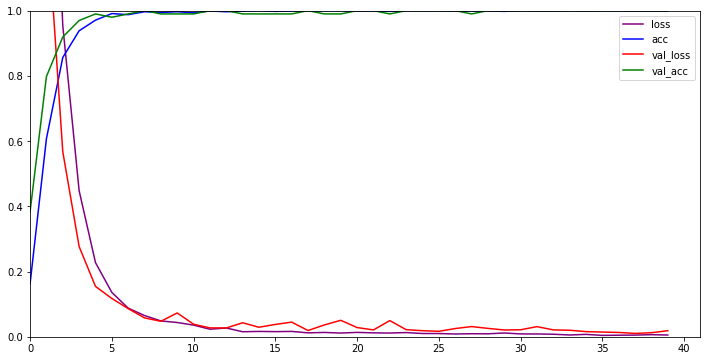

dropout of 0.4 has a val_loss at epoch 40 = 0.015943409875035286


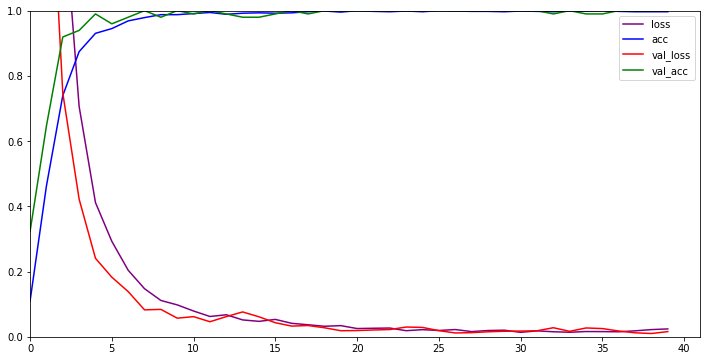

In [6]:
for dr in drop:
    model = create_model(weight_init='glorot_uniform',lr=0.01, decay=0.0, drop=dr)
    history = model.fit(x_train, y_cat, batch_size=128, epochs=40, verbose=0, validation_split=0.1)
    print("dropout of", dr, "has a val_loss at epoch 40 =", history.history["val_loss"][-1])
    plot_history(history)

=> dropout of 0.3 gives the lowest validation loss

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=192, activation="relu", kernel_initializer="glorot_uniform")`
  # This is added back by InteractiveShellApp.init_path()


batch size 32 has a val_loss at epoch 50 = 0.1827976362770329
batch size 32 has a val_loss at epoch 100 = 0.16297073963726166


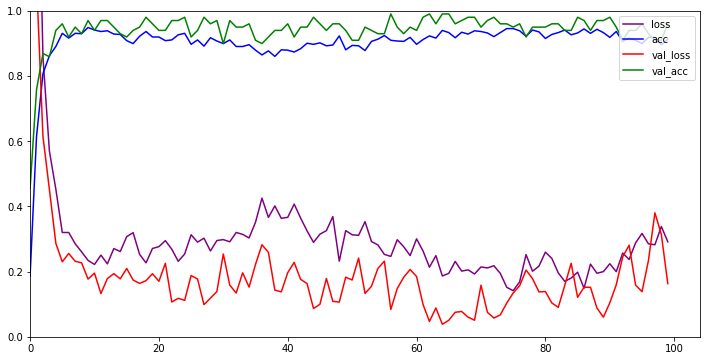

batch size 64 has a val_loss at epoch 50 = 0.08117533520315633
batch size 64 has a val_loss at epoch 100 = 0.07513034773633034


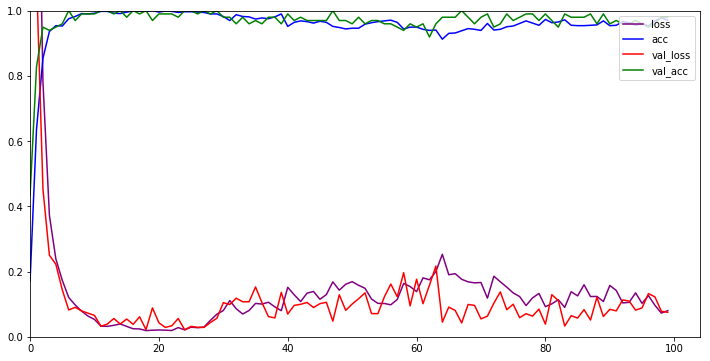

batch size 128 has a val_loss at epoch 50 = 0.005962405353784561
batch size 128 has a val_loss at epoch 100 = 0.0036563794128596783


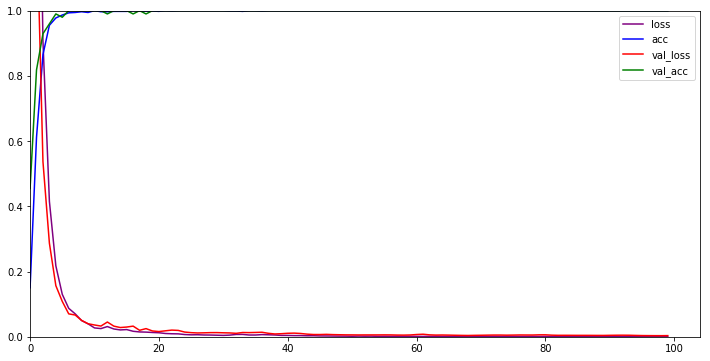

batch size 256 has a val_loss at epoch 50 = 0.020365430042147636
batch size 256 has a val_loss at epoch 100 = 0.014582198113203049


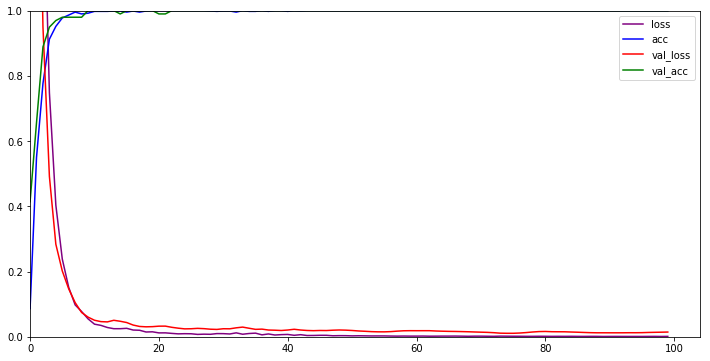

batch size 512 has a val_loss at epoch 50 = 0.012642333284020424
batch size 512 has a val_loss at epoch 100 = 0.008038637228310108


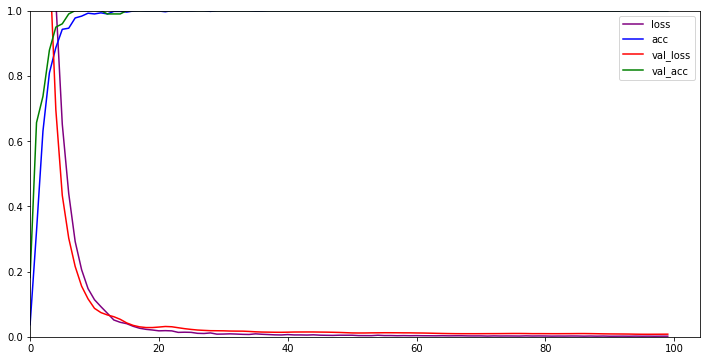

In [7]:
for bat in batch:
    model = create_model(weight_init='glorot_uniform',lr=0.01, decay=0.0, drop=0.3)
    history = model.fit(x_train, y_cat, batch_size=bat, epochs=100, verbose=0, shuffle=False, validation_split=0.1)
    print("batch size", bat, "has a val_loss at epoch 50 =", history.history["val_loss"][49])
    print("batch size", bat, "has a val_loss at epoch 100 =", history.history["val_loss"][-1])
    plot_history(history)

=> batch size of 512 gives stable and low validation loss

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(512, input_dim=192, activation="relu", kernel_initializer="glorot_uniform")`
  # This is added back by InteractiveShellApp.init_path()


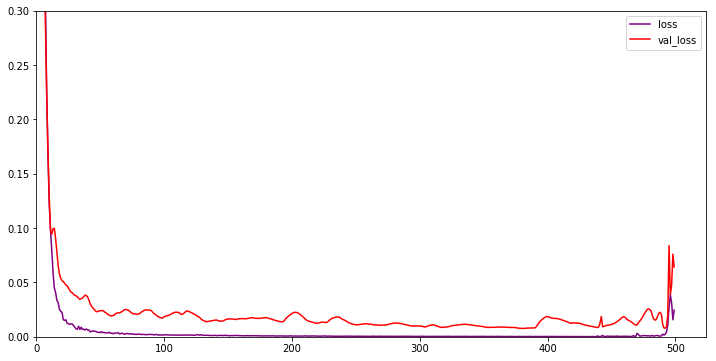

In [8]:
model = create_model(weight_init='glorot_uniform',lr=0.01, decay=0.0, drop=0.3)
history = model.fit(x_train, y_cat, batch_size=512, epochs=500, verbose=0, validation_split=0.1)

plt.figure(figsize=(12,6))
plt.plot(history.history["loss"], color="purple")
plt.plot(history.history["val_loss"], color="red")
plt.xlim(0,)
plt.ylim(0,0.3)
plt.legend(['loss', "val_loss"], loc='upper right')
plt.show()

In [9]:
y_prob = model.predict_proba(x_test)
# prepare csv for submission
submission = pd.DataFrame(y_prob, index=test_ids, columns=le.classes_)
submission.to_csv('submission.csv')